# TSF GRIP Task- #1 Prediction using Supervised ML


## Prediction of Percentage of Marks Using Linear Regression with Python

## Imports 

In [1]:
# Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (You'll import sklearn as you need it.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
# Read in the Dataset csv file from remote link as a DataFrame called students_data.

students_data = pd.read_csv("http://bit.ly/w-data")

## Check the head of students_data, and check out its info() and describe() methods.

In [36]:
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#  To get a concise summary of the dataframe

students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# To summarize statistics pertaining to the DataFrame columns.

students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

### Create a linear model plot (using seaborn's lmplot) to ckeck the relationship between Hours Studies vs. Marks Scored 

In [6]:
sns.set_palette("Set1")
sns.set_style('darkgrid')

Text(0.5, 1, 'Hours vs Percentage')

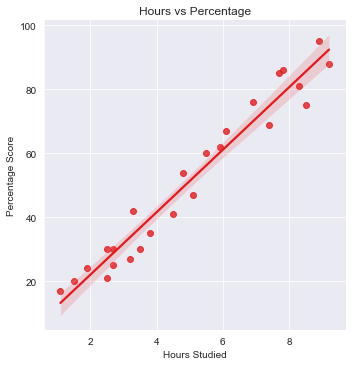

In [7]:
sns.lmplot(x='Hours',y='Scores',data= students_data)
plt.xlabel("Hours Studied") 
plt.ylabel("Percentage Score") 
plt.title("Hours vs Percentage")

### We can see above, there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the Data

### Since we have 1D arrays, we have to convert the data to 2D arrays to train the data.

Converting the dataframe series to numpy arrays.

In [8]:
Hours =students_data['Hours'].to_numpy()
Scores =students_data['Scores'].to_numpy()

Reshaping 1D arrays to 2D arrays.

In [9]:
Hours = Hours.reshape(-1,1)
Scores = Scores.reshape(-1,1)

## Training and Testing Data

Set a variable X equal to the Hours studied (attributes) of the students_data and a variable y equal to the "Scores" column (labels).

In [10]:
X = Hours
y = Scores

### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

### Import LinearRegression from sklearn.linear_model

In [13]:
from sklearn.linear_model import LinearRegression

### Create an instance of a LinearRegression() model named lm.

In [14]:
lm = LinearRegression()

### Train/fit lm on the training data

In [15]:
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Print out the coefficients of the model

In [16]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[9.96651548]]


## Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [20]:
predictions = lm.predict( X_test)

In [21]:
y_test = pd.Series(np.ravel(y_test))

In [22]:
predictions = pd.Series(np.ravel(predictions))

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


### Question:- What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
hours_studied = 9.25
hours_studied = np.array(hours_studied)
hours_studied = hours_studied.reshape(-1,1)


In [27]:
own_pred = lm.predict(hours_studied)
print("No of Hours = {}".format(hours_studied))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [94.29276126]


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares

### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


## Residuals

 Let's explore the residuals to make sure everything was okay with our data.

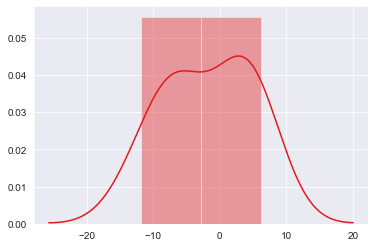

In [29]:
sns.distplot((y_test-predictions))